- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [158]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

- Объеденим тома текста "война и мир"
- Очистим
- Оставим только русские буквы и символы пробела
- Построим матрицу переходных вероятностей

In [90]:
regex = re.compile("[а-я]+")
def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""
    

text = ""
for i in range(1, 5):
    with open(f'war_and_peace/tom_{i}.txt', 'r') as f:
        tom = f.read().lower()
    
    text = text + words_only(tom) + " "
    text = text.replace("  ", " ")


text[:2000]

'лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех или если вас граф или князь нет в виду ничего лучшего 

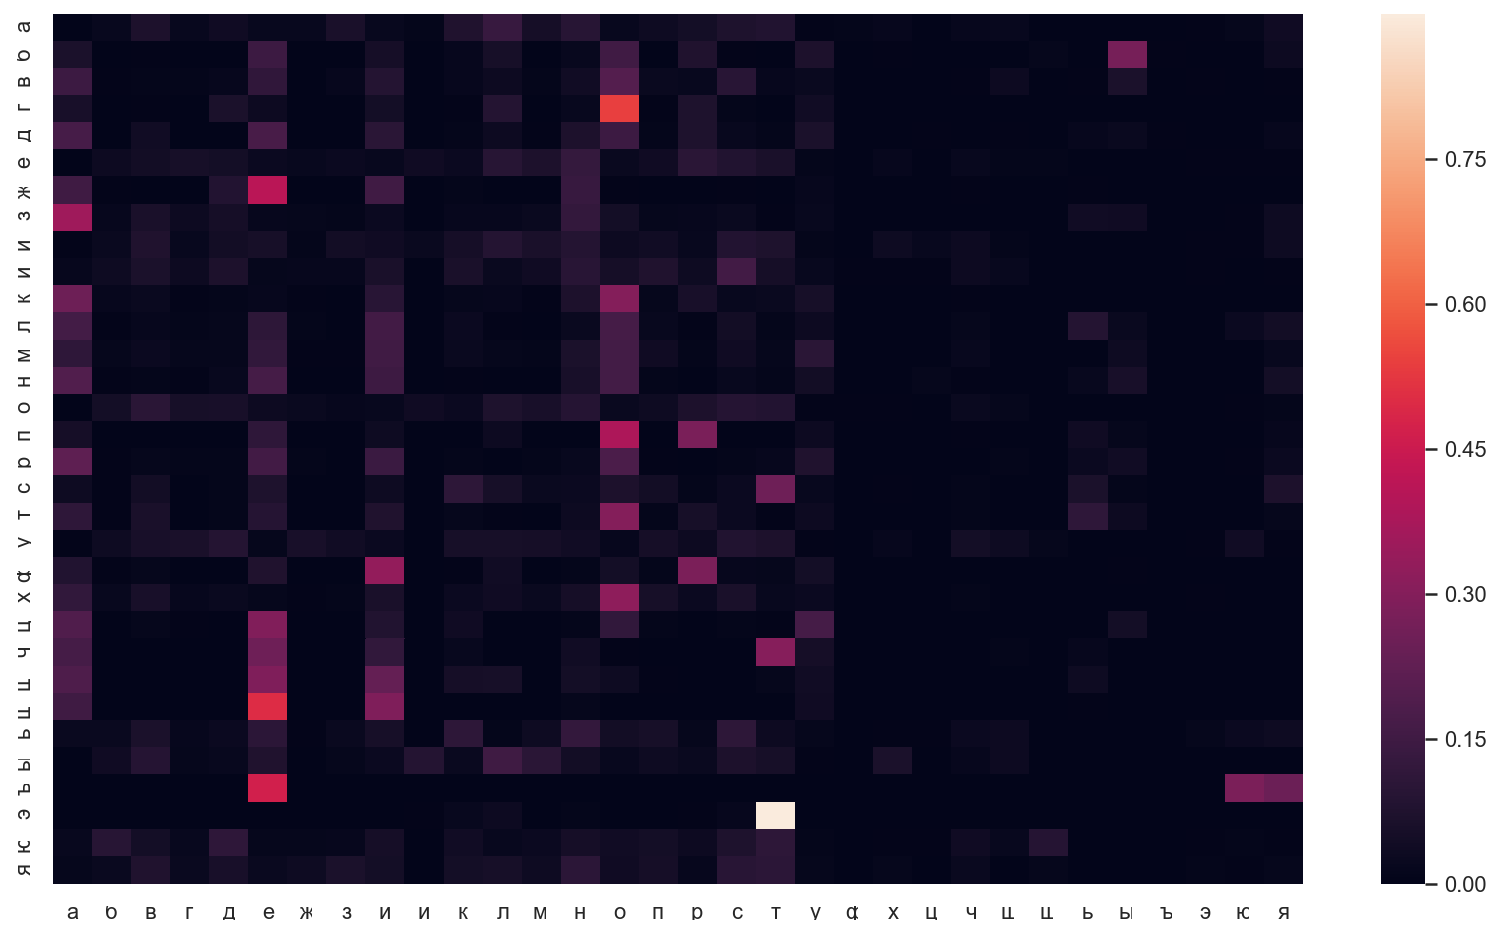

In [91]:
text_ru = re.sub('[^а-я]', '', text)

RU = 'абвгдежзийклмнопрстуфхцчшщьыъэюя' # исключая 'ё'
POS = {l: i for i, l in enumerate(RU)}

probabilities = np.zeros((len(RU), len(RU)))
# probabilities = np.ones((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text_ru[:-1], text_ru[1:]):
#     if (cp!=' ') and (cn!=' '):
#         probabilities[POS[cp], POS[cn]] += 1
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
df = pd.DataFrame(probabilities, index=(c for c in RU), columns=(c for c in RU))

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

- Посчитаем вероятность встретить строку из 4-х символов, которая начинается 'п', а кончается на 'р'; 
- Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы 'Б' и имеющее длину 8-мь символов _len(words)=9_

In [147]:
start = POS['п']
end = POS['р']
prior = 1. / len(RU)
d1 = {}
d2 = {}

for c1 in RU:
    for c2 in RU:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            d1[''.join(['п', c1, c2, 'р'])]='{}'.format(proba)
            d2[''.join(['п', c1, c2, 'р'])]= proba
#             print(''.join(['п', c1, c2, 'р']), proba)


for k, v in d1.items():
    print(k, v)
    if 'панр' in k:
        break


print("\n#######d1#######")
prr = np.array([float(v) for i in range(len(d1)) for k, v in d1.items()]).sum()  
print(prr)

pr = 0
for i in range(len(d1)):
    for k, v in d1.items():
        pr =+ float(v)
print(pr)

from decimal import *
getcontext().prec = 30
print(sum([Decimal(v) for k, v in d1.items()]))

print("\n#######d2#######")
prr_2 = np.array([float(v) for i in range(len(d2)) for k, v in d2.items()]).sum()  
print(prr_2)

pr_2 = 0
for i in range(len(d2)):
    for k, v in d2.items():
        pr_2 =+ v
print(pr_2)

from decimal import *
getcontext().prec = 30
print(sum([Decimal(v) for k, v in d2.items()]))

паар 2.5995388227900577e-07
пабр 2.2790682068014613e-06
павр 2.306313096837757e-06
пагр 2.100507798345619e-06
падр 4.432164840939361e-06
паер 3.377530375866005e-06
пажр 1.59737552856315e-08
пазр 1.6929849915253648e-06
паир 5.755102751274013e-07
пайр 5.047226450451695e-07
пакр 6.9097458010584755e-06
палр 1.0456816034100697e-06
памр 6.661620900365866e-07
панр 4.324340722514072e-07

#######d1#######
1.1111608569369158
8.430482662587596e-08
0.001333926598963883943090030426

#######d2#######
1.1111608569369158
8.430482662587596e-08
0.00133392659896388394189158046538


In [197]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RU), p=probabilities[index])
    s.append(next_char)

print (''.join(s))
# print (len(''.join(s)))

бушелимик


- Выберите ряд и оцените его через HMM
- Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда

In [154]:
series = pd.read_csv("../Series/weekly-closings-of-the-dowjones-.csv")["Close"].dropna()

In [156]:
values = series.values.reshape(-1,1)

In [164]:
d3 = {}

for n in range(1, 50):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    d3['{}'.format(n)]=model.score(values)
#     print (n, model.score(values))

Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 287 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 359 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 398 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 439 free scalar parameters with only 162 data points will result in a degenerate so

In [174]:
d3['49']

-422.1936479858219

In [175]:
model = GaussianHMM(n_components=49,
                        covariance_type="diag",
                        n_iter=1000)

In [176]:
model.fit(values)

Fitting a model with 2498 free scalar parameters with only 162 data points will result in a degenerate solution.


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=49, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [177]:
labels = model.predict(values)
means = np.zeros_like(values)

for i in range(model.n_components):
    means[labels == i] = model.means_[i]

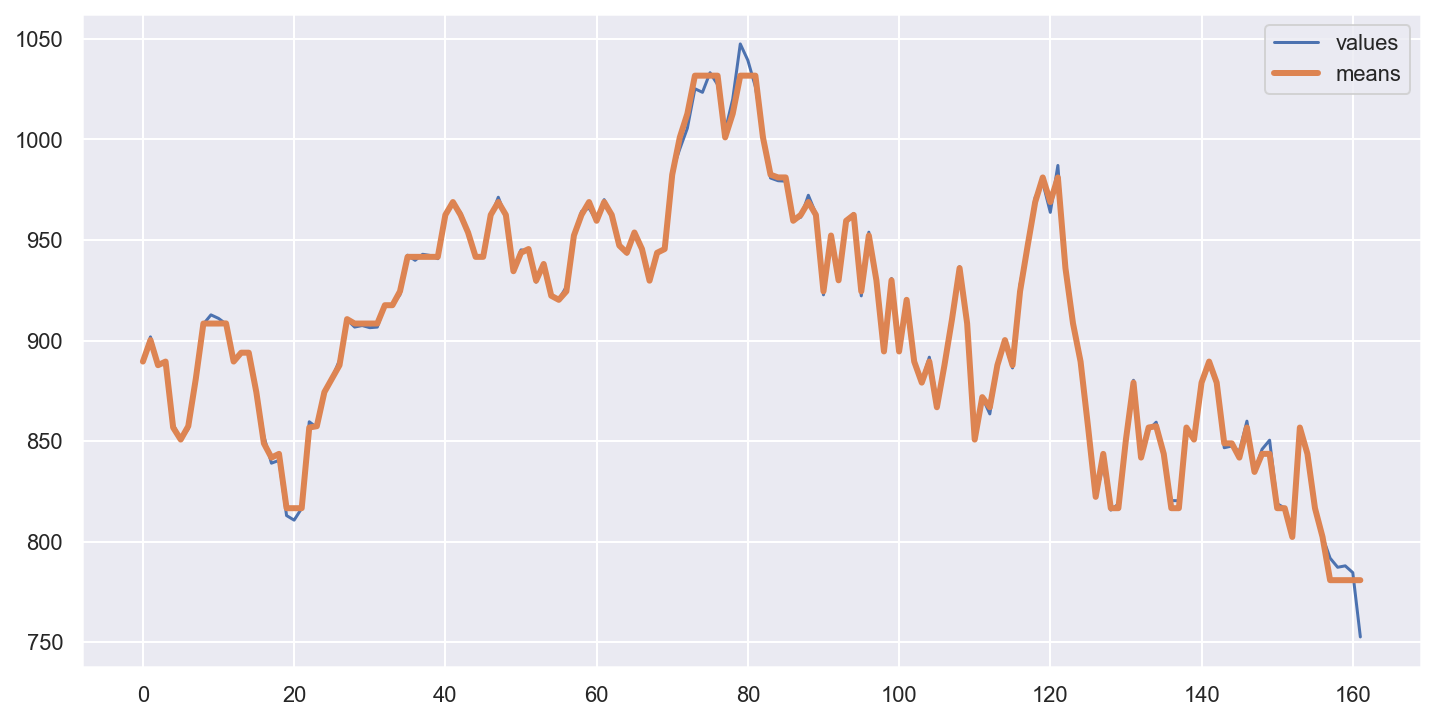

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(values, label='values')
plt.plot(means, linewidth=3, label='means')
plt.legend()
plt.show()

In [ ]:
pass